# Importing libraries and Data

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
path = r'C:\Users\chris\Desktop\Career Foundry\Instacart 2023'

In [6]:
df_merged_all= pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data','df_merged_all.pkl'))

<Axes: ylabel='Frequency'>

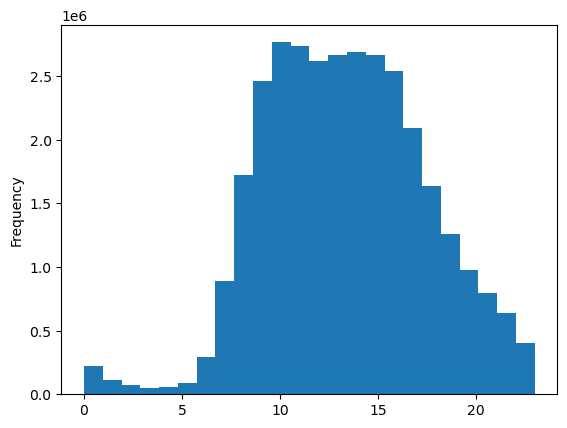

In [7]:
# creating histogram of order_hour_of_day
df_merged_all['order_hour_of_day'].plot.hist(bins = 24)

#3 The histogram depicts that majority of orders are placed between the hours of 9 PM to 4 PM. There are very few orders placed between the early morning hours, up to about 7 am.  In addiion, orders begin to taper off around 6 PM.

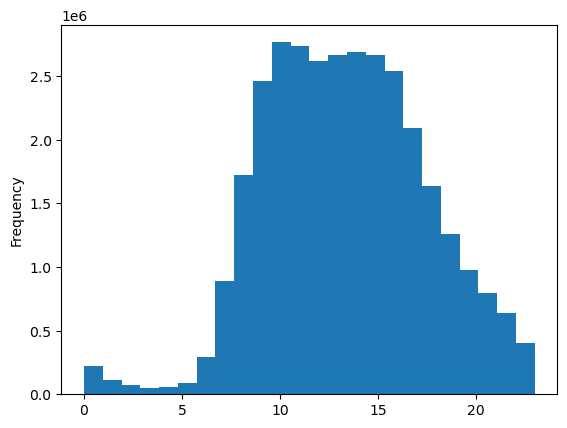

In [9]:
hist_time = df_merged_all['order_hour_of_day'].plot.hist(bins = 24)

In [10]:
# saving histogram
hist_time.figure.savefig(os.path.join(path, 'Analysis', 'hist_order_hour.png'))

In [12]:
df_merged_all.head()

user_id First Name Last Name  Gender     State  Age date_joined  \
0    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
1    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
2    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
3    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   
4    26711    Deborah  Esquivel  Female  Missouri   48    1/1/2017   

   n_dependants fam_status  income  ...    price_range_loc    Busiest_days  \
0             3    married  165665  ...  Mid-range product    Busiest days   
1             3    married  165665  ...  Mid-range product  Regularly busy   
2             3    married  165665  ...  Mid-range product    Busiest days   
3             3    married  165665  ...  Mid-range product  Regularly busy   
4             3    married  165665  ...  Mid-range product    Slowest days   

   busiest_period_of_day  max_order  loyalty_flag  prices_mean  Spending_flag  \
0         Average orders          8  New customer     7.483644    Low Spender   
1         Average orders          8  New customer     6.085714    Low Spender   
2         Average orders          8  New customer    11.070000   High Spender   
3         Average orders          8  New customer          NaN            NaN   
4            Most orders          8  New customer          NaN            NaN   

   Order_frequency     Frequency_flag  _merge  
0              8.0  Frequent customer    both  
1             20.0   Regular customer    both  
2              5.0  Frequent customer    both  
3              NaN                NaN    both  
4              NaN                NaN    both  

[5 rows x 32 columns]

<Axes: >

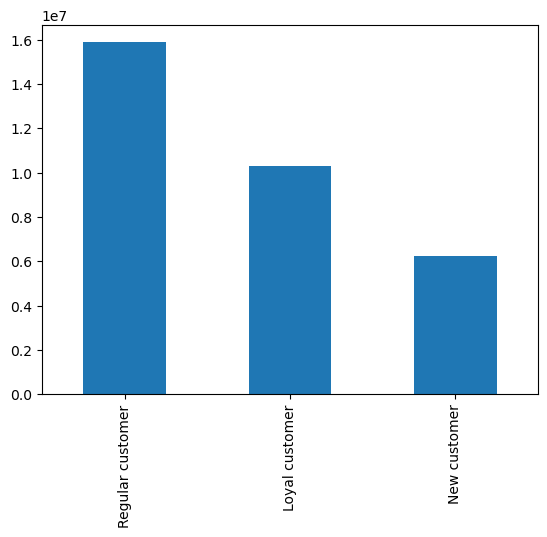

In [14]:
# creating bar chart on loyalty flag
df_merged_all['loyalty_flag'].value_counts().plot.bar()

#04 Regular customers have the highest number of orders, followed by Loyal customers.  As expected, New customers have the fewest orders placed.

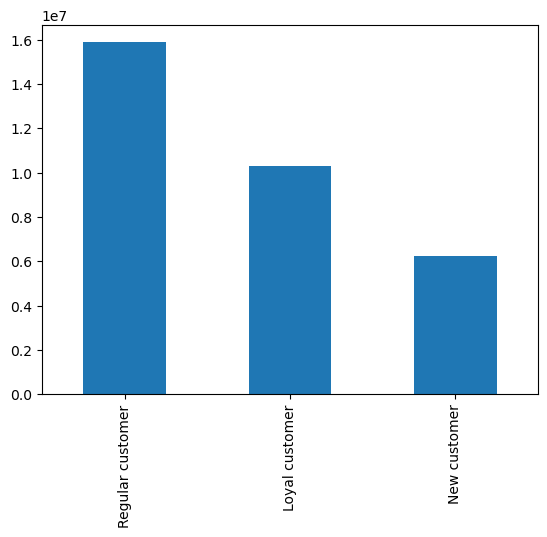

In [16]:
bar_loyalty = df_merged_all['loyalty_flag'].value_counts().plot.bar()

In [18]:
# saving bar chart
bar_loyalty.figure.savefig(os.path.join(path, 'Analysis', 'bar_loyalty.png'))

# 02 Creating Random Sample

In [19]:
#creating sample
np.random.seed(4)

In [20]:
dev = np.random.rand(len(df_merged_all)) <= 0.7

In [21]:
big = df_merged_all[dev]
small = df_merged_all [~dev]

In [23]:
len(df_merged_all)

32434212

In [25]:
len(big) + len(small)

32434212

In [26]:
df_price_hour = small[['order_hour_of_day','prices']]

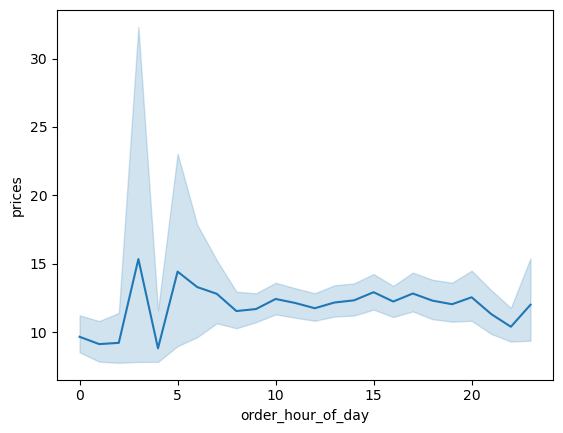

In [27]:
line_price_hour = sns.lineplot(data = df_price_hour, x = 'order_hour_of_day', y = 'prices')

#5 Interestingly, higher price items are purchased during the early morning hours, which is the slowest time for orders.  From 10 am to 11 PM, order prices remain steady, with prices under $15 dollars.

In [28]:
# saving line graph
line_price_hour.figure.savefig(os.path.join(path, 'Analysis', 'line_price_hour.png'))

In [30]:
# checking connection between age and family situation
df_age_fam = small[['Age','n_dependants']]

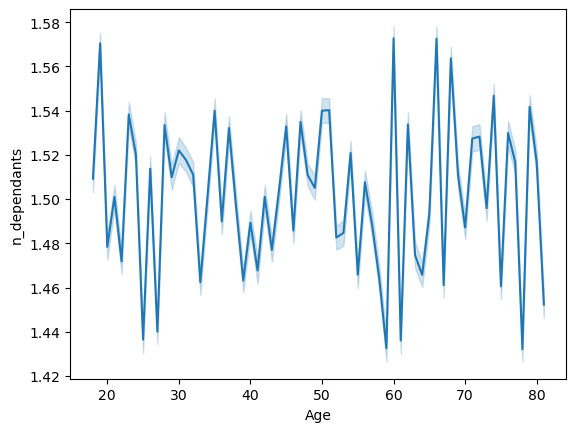

In [31]:
# creating line chart between age and family situation
df_age_fam_dep = sns.lineplot(data = df_age_fam, x = 'Age', y = 'n_dependants')

#6 The line chart depicts there is no correlation between age and family situation or number of dependants. 

In [32]:
# saving line graph
df_age_fam_dep.figure.savefig(os.path.join(path, 'Analysis', 'df_age_fam_dep.png'))

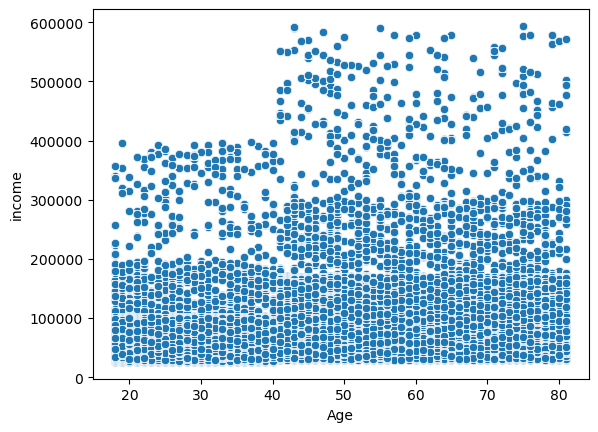

In [36]:
# creating scatter plot between age and income
df_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_merged_all)

#7 The scatterplot shows there is a possible connection between income and age.  People between the ages of early 40s and 80s have higher income of $40,000 and higher.  It appears the highest income is around $60,000 and is also distributed across the age groups mentioned.

In [37]:
# saving scatterplot
df_age_income.figure.savefig(os.path.join(path, 'Analysis', 'df_age_income.png'))